In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Delta functions
<hr style="border-width:4px; border-color:coral"></hr>

Mathematically, the Dirac delta function is not really a function, but rather a "distribution".  It cannot be evaluated directly.  Rather, we describe the delta function $\delta(x)$ as a **linear functional** with the following property :  

\begin{equation}
\int_{-\infty}^{\infty} f(\xi) \delta(\xi) \, d\xi = f(0)
\end{equation}

Several properties follow from this definition. 

**Sifting property** (or **translation** property)

\begin{equation}
\int_{-\infty}^{\infty} f(\xi) \delta(\xi - x) \, d\xi = f(x)
\end{equation}

For $f(x) = 1$, we have 

\begin{equation}
\int_{-\infty}^{\infty} \delta(\xi) \, d\xi = 1
\end{equation}


**Scaling property**

\begin{equation}
\delta(ax) = \frac{1}{|a|}\delta(x)
\end{equation}


It will also be convenient to express the **anti-derivative** of the Dirac delta in terms of the **Heaviside function** $H(x)$. 

\begin{equation}
\int_{-\infty}^x \delta(\xi) d\xi = H(x)
\end{equation}

or 

\begin{equation}
H^\prime(x) = \delta(x)
\end{equation}



# Discrete Delta functions
<hr style="border-width:4px; border-color:coral"></hr>

In numerics, we often want to represent the delta function as a continuous function that we can evaluate.   In particular, it will be important to be able to evaluate $\delta(x-x_m)$ for non-grid aligned data $(x_m,t_m)$. 

We seek functions which satisfy the properties above, either in an exact sense or in a approximate sense.   

There are several formulas for discrete delta functions $\hat{\delta}_\varepsilon(x)$ for $\varepsilon \ll 1$.  Three candidates are given below.

**Step function**

\begin{equation}
\mbox{Step} \qquad \hat{\delta}_\varepsilon(x) = \left\{\begin{array}{lr}
\frac{1}{\varepsilon} & -\frac{\varepsilon}{2} \le x < \frac{\varepsilon}{2} \\
0 & \mbox{otherwise}
\end{array}\right.
\end{equation}

This is closest to the "0-1" solution commonly used in data assimilation.  Note that the delta function should scale like $1/\varepsilon$ for $\varepsilon \ll 1$. 

**Hat function**
\begin{equation}
\mbox{Hat} \qquad \hat{\delta}_\varepsilon(x) = \left\{\begin{array}{lr}
\frac{2}{\varepsilon} (1-\frac{\left|2x\right|}{\varepsilon}) & -\frac{\varepsilon}{2} \le x < \frac{\varepsilon}{2} \\
0 & \mbox{otherwise}
\end{array}\right.
\end{equation}

**Heat kernel**

\begin{equation}
\mbox{Heat kernel} \qquad\hat{\delta}_\varepsilon(x) = \frac{1}{\sqrt{4\pi \varepsilon}}e^{-x^2/4\varepsilon}
\end{equation}

<!-- There is also a mistake in the “hat function”.  It should be 
\begin{equation}
(2/\varepsilon)(1-|2x|/\varepsilon) \qquad x \in [-\varepsilon/2,\varepsilon/2]
\end{equation}
and 0 otherwise. -->



## Exercise #1
<hr style="border-width:2px; border-color:black"></hr>


On separate graphs, plot each of the three discrete delta functions over the interval $[-1,1]$. 

* Choose $\varepsilon = 0.05$.   
 
* Your plot should have enough resolution to you can see exactly what the delta function looks like. For example, set $x$ to 

      x = linspace(-1,1,1001)
      
**Tips**

* **Step function.**  Write the Step function in terms of the Heaviside function.  Then use the Numpy function `heavside(x,1)`, where the second argument is the value of $H(0)$.  

<hr style="border-width:2px; border-color:coral"></hr>

### Comments

You can also express the step function in terms of a Heaviside function : 

\begin{equation}
\delta_{\varepsilon}(x) = \frac{H(x+\varepsilon/2) - H(x-\varepsilon/2)}{\varepsilon}
\end{equation}

You can express this in Numpy as : 

    def delta_step(x,a):
        return (heaviside(x+a/2,1) - heaviside(x-a/2,1))/a

This uses the Numpy command `np.heaviside(x,value_at_0)`. 

**Note:**  Because we have used the "magic commands" `%matplotlib notebook` and `%pylab` at the top of the notebook, you don't need to preface each Numpy command with `np.`.  


<IPython.core.display.Javascript object>


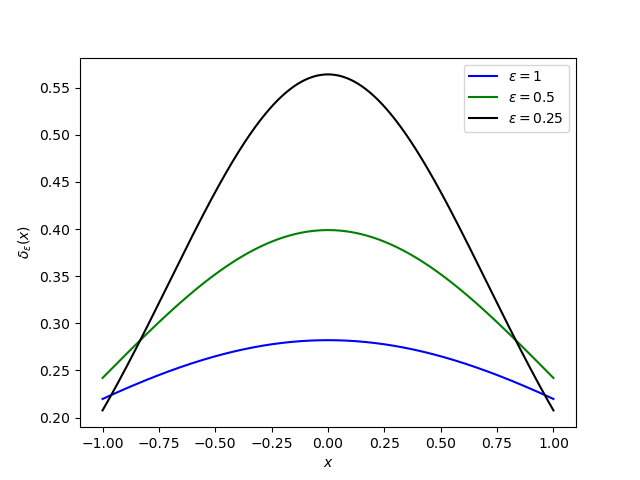

In [84]:
# To get different figures, use the `figure()` command
figure(1)
clf()

x=np.linspace(-1,1,1001)
np.heaviside(x,0)
epsilon=1
def delta_step(x,epsilon):
    S=(1/sqrt(4*np.pi*epsilon)*exp(-x**2/(4*epsilon)))
    return S
S=delta_step(x,epsilon)
plt.plot(x,S, "b" )
xlabel('$x$')
ylabel('${\delta_{\epsilon}{(x)}}$')
# legend(['${\epsilon}=1$'])
# plt.show()
x=np.linspace(-1,1,1001)
np.heaviside(x,0)
epsilon=0.5
def delta_step(x,epsilon):
    S=(1/sqrt(4*np.pi*epsilon)*exp(-x**2/(4*epsilon)))
    return S
S=delta_step(x,epsilon)
plt.plot(x,S, "g")
xlabel('$x$')
ylabel('${\delta_{\epsilon}{(x)}}$')

legend(['${\epsilon}=1$'])
# plt.show()
x=np.linspace(-1,1,1001)
np.heaviside(x,0)
epsilon=0.25
def delta_step(x,epsilon):
    S=(1/sqrt(4*np.pi*epsilon)*exp(-x**2/(4*epsilon)))
    return S
S=delta_step(x,epsilon)
plt.plot(x,S, "k")
xlabel('$x$')
ylabel('${\delta_{\epsilon}{(x)}}$')
# legend(['${\epsilon}=0.25$'])
legend(['${\epsilon}=1$', '${\epsilon}=0.5$','${\epsilon}=0.25$'])
plt.show()
# plt.annotate('${\epsilon}=1$'),
#              xy=(t, ), xycoords='data',
#              xytext=(+10, +30), textcoords='offset points', fontsize=16,
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

In [7]:
x=np.linspace(-1,1,1001)
np.heaviside(x,0)
epsilon=0.05
def delta_step(x,epsilon):
    S=(heaviside(x+epsilon/2,1) - heaviside(x-epsilon/2,1))/epsilon
    return S
S=delta_step(x,epsilon)
# plt.plot(x,S, "b")
# xlabel('$x$')
# ylabel('${\delta_{\epsilon}{(x)}}$')
# legend(['${\epsilon}=0.5$'])
# legend(['${\epsilon}=1$'])
# plt.show()

In [8]:
x=np.linspace(-1,1,1001)
np.heaviside(x,0)
epsilon=0.25
def delta_step(x,epsilon):
    S=(heaviside(x+epsilon/2,1) - heaviside(x-epsilon/2,1))/epsilon
    return S
S=delta_step(x,epsilon)
# plt.plot(x,S, "k")
# xlabel('$x$')
# ylabel('${\delta_{\epsilon}{(x)}}$')
# legend(['${\epsilon}=0.25$'])
# plt.show()

<IPython.core.display.Javascript object>


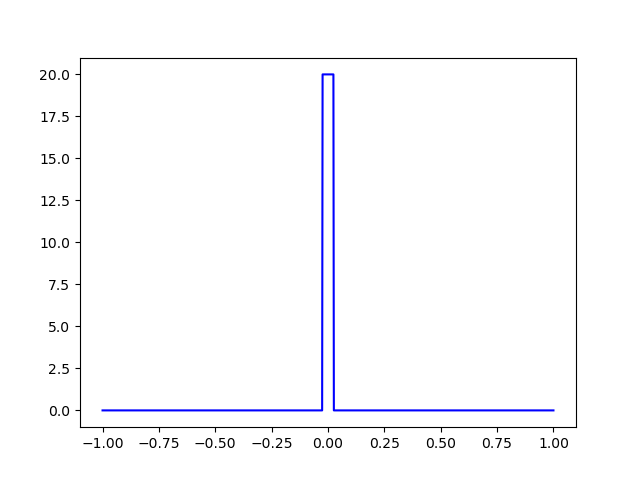

In [74]:
# To get different figures, use the `figure()` command
figure(3)
clf()

# COMMENT : You only need to define the Step function once (you have it above)

# Graphs for exercise 1
epsilon=0.05
x=linspace(-1,1,1001)
def Stepfunct(x):
    S=np.where(abs(x)<=(epsilon/2),(1/epsilon),0)
    return S
S=Stepfunct(x)
plt.plot(x,S, "b")


In [9]:
# figure(4)
# clf()

# Graphs for exercise 1
epsilon=0.05
x=linspace(-1,1,1001)
def Hatfunct(x):
    H=np.where(abs(x)<=(epsilon/2),(2/epsilon)*(1-abs((2*x))/epsilon),0)
    return H
H=Hatfunct(x)
# plt.plot(x,H, "b")
# legend(['${\epsilon}=0.05$'])
# xlabel('$x$')
# ylabel('${\delta_{\epsilon}{(x)}}$')
# plt.show()



In [11]:
# figure(5)
# clf()

# Graphs for exercise 1
epsilon=0.05
x=linspace(-1,1,1001)
def Heatkernel(x):
    # COMMENT : This expression has a bug
#     Hk= (1/((4*np.pi*epsilon)**(0.5)))*exp(-x**2/(4*epsilon))
    Hk= (1/sqrt(4*np.pi*epsilon)*exp(-x**2/(4*epsilon)))
    return Hk

# # COMMENT : You are calling your hat function again (:-))
# # Hk=Hatfunct(x)
# Hk = Heatkernel(x)
# plt.plot(x,Hk, "b")

# legend(['${\epsilon}=0.05$'])
# xlabel('$x$')
# ylabel('${\delta_{\epsilon}{(x)}}$')
# plt.show()
# # 

.
# Question : Why the Graphs above are the same for the  Kernel and Heat function but not for the step function ??????

You were calling your Hat function twice.  Also, you had a bug in your Heatkernel (see above). 


# Answer : Yes okay! I saw it Thank you so much

## Exercise #2
<hr style="border-width:2px; border-color:black"></hr>

Verify analytically that each of the three delta functions satisfy 

\begin{equation}
\int_{-\infty}^{\infty} \hat{\delta}_\varepsilon(\xi) \, d\xi = 1
\end{equation}

### Your solution

**Step function**

\begin{equation}
\int_{ - \frac{\varepsilon }{2}}^{\frac{\varepsilon }{2}} {{{\hat \delta }_\varepsilon }(x)dx = \int_{ - \frac{\varepsilon }{2}}^{\frac{\varepsilon }{2}} {\frac{1}{\varepsilon }dx} }  = \frac{1}{\varepsilon }\left[ {\frac{\varepsilon }{2} + \frac{\varepsilon }{2}} \right] = 1
\end{equation}


**Hat function**

\begin{align}
&\int_{ - \frac{\varepsilon }{2}}^{\frac{\varepsilon }{2}} {{{\hat \delta }_\varepsilon }(x)dx = \int_{ - \frac{\varepsilon }{2}}^{\frac{\varepsilon }{2}} {\frac{2}{\varepsilon }\left( {1 - \frac{{\left| {2x} \right|}}{\varepsilon }} \right)dx} } \\
 &= \int_{ - \frac{\varepsilon }{2}}^0 {\frac{2}{\varepsilon }\left( {1 + \frac{{2x}}{\varepsilon }} \right)dx}  + \int_0^{\frac{\varepsilon }{2}} {\frac{2}{\varepsilon }\left( {1 - \frac{{2x}}{\varepsilon }} \right)dx} \\
 &= \frac{2}{\varepsilon }\left\{ {\frac{\varepsilon }{2} + \frac{2}{\varepsilon }\left[ { - \frac{{{\varepsilon ^2}}}{8}} \right]} \right\} + \frac{2}{\varepsilon }\left\{ {\varepsilon \frac{{}}{2} - \frac{2}{\varepsilon }\left[ { - \frac{{{\varepsilon ^2}}}{8}} \right]} \right\}\\
 &= \frac{2}{\varepsilon }\left( {\frac{\varepsilon }{4}} \right) + \frac{2}{\varepsilon }\left( {\frac{\varepsilon }{4}} \right)\\
 &= 1
\end{align}

**Heat kernel**

**Recall: Gauss Integral**

\begin{equation}
\int_{ - \infty }^\infty  {\exp \left( { - \alpha {x^2}} \right)} dx = \sqrt {\frac{\pi }{\alpha }}\\
\int_{ - \infty }^0  {\exp \left( { - \alpha {x^2}} \right)} dx = {\frac{1}{2}} \sqrt {\frac{\pi }{\alpha }}
\end{equation}



\begin{eqnarray}
\int_{-\infty}^\infty  \hat{\delta}_{\varepsilon}(x)dx & = & \int_{ - \infty }^\infty  
\frac{1}{\sqrt{4\pi \varepsilon }} \exp \left[- \frac{x^2}{4\varepsilon} \right]dx\\
 & = & \frac{1}{\sqrt{4\pi \varepsilon}}\int\limits_{ - \infty }^\infty 
 \exp \left[-\frac{x^2}{4\varepsilon } \right]dx \\
 & = & \frac{1}{\sqrt{4\pi \varepsilon}}\left\{\sqrt {4\pi \varepsilon } \right\} = 1
\end{eqnarray}


<hr style="border-width:2px; border-color:coral"></hr>

### Comments

Might be better to use `\begin{equation}` and `\end{equation}` for typesetting math fonts (unless you have inline math symbols).

<hr style="border-width:2px; border-color:coral"></hr>



Hello,
To verify $\lim_{\varepsilon \to 0} \int_{-\infty}^x \hat{\delta}_\varepsilon(\xi) \, d\xi = H(x)$ 
for the Hat function, I got $2{\eta^2}$ for the Case 2a ($-\varepsilon/2 \le x <0 $)  and   - 1 +  4$\eta$    - 2${\eta^2}$  for the Case 2b ($0 \le x < \varepsilon/2 $) instead to get just $\eta$. 
Should I combine the two values? Is there any approximation for that? 


For the Heat kernel I found $\int_{ - \infty }^x {{{\hat \delta }_\varepsilon }} (\xi ){\mkern 1mu} d\xi  = \frac{1}{2} + \frac{1}{2}\mbox{erfc}\left( x \right)$ but, if I want to evaluate the limit;
Knowing that $\mbox{erf}(x)$ is not a linear function, what would be the value of $\mathop {\lim }\limits_{\varepsilon  \to 0} \mbox{erf}\left( { - \frac{\varepsilon }{2} + \varepsilon \eta } \right)$ ?  And how to introduce the $\mbox{erfc}(x)$ knowing that $\mbox{erfc}(-x)=-\mbox{erfc}(x)$? 

Hello, 

I want to solve numerically the scalar advection equation but, I wolud like please, some clarification about the final expression of the fundamental solution $G_0$, 
I found that: 
\begin{equation}
{G_0}\left( {x,t,\xi ,\tau } \right) = \delta \left( {x - \xi  - c\left( {t - \tau } \right)} \right)H(t - \tau ) = \delta \left( {x - \xi } \right)\delta \left( {t - \tau } \right)H(t - \tau )\\
\end{equation}
    
Also, Because $\delta \left( x \right) = \mathop {\lim }\limits_{\varepsilon  \to 0} {\delta _\varepsilon }\left( x \right)$; then I can deduce  $\delta \left( {x - \xi } \right)$ for spatial discretisation  but, what about the temporal discretisation $\delta \left( {t - \tau } \right)$? 
Is it possible to set: $t =  - \tau /2 + \tau \eta $ as we did with $x$?

## Exercise #3
<hr style="border-width:2px; border-color:black"></hr>

Verify that

\begin{equation}
\lim_{\varepsilon \to 0} \int_{-\infty}^x \hat{\delta}_\varepsilon(\xi) \, d\xi = H(x)
\end{equation}

holds for each discrete delta. 

### Your solution

**Step function**
<!-- $$\begin{array}{l}
 \mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^\xi  {{{\hat \delta }_\varepsilon }} (x){\mkern 1mu} dx = \int_{ - \infty }^\xi  {\mathop {\lim }\limits_{\varepsilon  \to 0} {{\hat \delta }_\varepsilon }} \left( x \right)dx\\
 = \int_{ - \infty }^\xi  \delta  (x){\mkern 1mu} dx\\
 = H\left( \xi  \right)
\end{array}$$ -->


\begin{equation}
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^\xi  {\frac{1}{\varepsilon }d\xi }  = \mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \frac{\varepsilon }{2}}^\xi  {\frac{1}{\varepsilon }d\xi }  = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{\varepsilon }\left[ \xi  \right] + \frac{1}{\varepsilon }\left[ {\frac{\varepsilon }{2}} \right]} \right\} = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{\xi }{\varepsilon } + \frac{1}{2}} \right\}\\
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^x {{{\hat \delta }_\varepsilon }} (\xi ){\mkern 1mu} d\xi  = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + \frac{\xi }{\varepsilon }} \right\} = \left\{ {\begin{array}{*{20}{l}}
{1;if\xi  = \frac{\varepsilon }{2}}\\
{\frac{1}{2};if\xi  = 0}\\
{0;if\xi  =  - \frac{\varepsilon }{2}}
\end{array}} \right. = H\left( \xi  \right)
\end{equation}

<font color=red>Comment : This is basically right, but it looks like you inverted one of the fractions.  If your correct this, then you will need to do the substitution in the hint.  (See comments below). </font>

<font color=blue >Comment : Yes that is true I have actually modified it </font>

Method2
\begin{equation}
Set;\xi  =  - \frac{\varepsilon }{2} + \varepsilon \eta \\
Then,\mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + \frac{\xi }{\varepsilon }} \right\} = \mathop {\lim }\limits_{\varepsilon  \to 0} {H_\varepsilon }(\xi ) = \frac{1}{2} - \frac{1}{2} + \eta =\eta\\
\end{equation}


**Hat function**
<!-- $$\begin{array}{l}
 \mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^\xi  {{{\hat \delta }_\varepsilon }} (x){\mkern 1mu} dx = \int_{ - \infty }^\xi  {\mathop {\lim }\limits_{\varepsilon  \to 0} {{\hat \delta }_\varepsilon }} \left( x \right)dx\\
 = \int_{ - \infty }^\xi  \delta  (x){\mkern 1mu} dx\\
 = H\left( \xi  \right)
\end{array}$$ -->

\begin{align}
Set;\xi  =  - \frac{\varepsilon }{2} + \varepsilon \eta \\
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \frac{\varepsilon }{2}}^\xi  {{{\hat \delta }_\varepsilon }(x)dx \\ =\mathop  {\lim }\limits_{\varepsilon  \to 0} \int_{ - \frac{\varepsilon }{2}}^\xi  {\frac{2}{\varepsilon }\left( {1 - \frac{{\left| {2x} \right|}}{\varepsilon }} \right)dx} }  &= \mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \frac{\varepsilon }{2}}^{ - \frac{\varepsilon }{2} + \varepsilon \eta } {\frac{2}{\varepsilon }\left( {1 - \frac{{\left| {2x} \right|}}{\varepsilon }} \right)dx} \\
& = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\int_{ - \frac{\varepsilon }{2}}^{ - \frac{\varepsilon }{2} + \varepsilon \eta } {\frac{2}{\varepsilon }\left( {1 - \frac{{2x}}{\varepsilon }} \right)dx}  + \int_{ - \frac{\varepsilon }{2}}^{ - \frac{\varepsilon }{2} + \varepsilon \eta } {\frac{2}{\varepsilon }\left( {1 + \frac{{2x}}{\varepsilon }} \right)dx} } \right\}\\
 &= \frac{2}{\varepsilon }\left\{ {\left[ x \right]_{ - \frac{\varepsilon }{2}}^{ - \frac{\varepsilon }{2} + \varepsilon \eta } - \frac{1}{\varepsilon }\left[ {{x^2}} \right]_{ - \frac{\varepsilon }{2}}^{ - \frac{\varepsilon }{2} + \varepsilon \eta } + \left[ x \right]_{ - \frac{\varepsilon }{2}}^{ - \frac{\varepsilon }{2} + \varepsilon \eta } + \frac{1}{\varepsilon }\left[ {{x^2}} \right]_{ - \frac{\varepsilon }{2}}^{ - \frac{\varepsilon }{2} + \varepsilon \eta }} \right\}\\
& = \frac{2}{\varepsilon }\left[ {\varepsilon \eta  + \varepsilon \eta } \right] = 4\eta  \approx \eta ;\forall 0 \le \eta  \le 1 \textbf{??????? Is it GOOD TO APPROXIMATE LIKE THIS?}
\end{align}

<font color=red>Variables $x$, $\xi$ and $\eta$ each play their own role.  The variable $x$ is the independent variable in $H(x)$.  The variable $\xi$ should be used as the dummy variable in the integral.  Compute the integral to get an expression involving $x$ and $\varepsilon$.   Once you have this expression, make the substitution $x = -\varepsilon/2 + \varepsilon \eta$. See comments below. </font>



**Method 2:**

$if\xi  \le 0$

\begin{align}
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \frac{\varepsilon }{2}}^\xi  {{{\hat \delta }_\varepsilon }(x)dx = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{2}{\varepsilon }\int_{ - \frac{\varepsilon }{2}}^\xi  {\left( {1 - \frac{{\left| {2x} \right|}}{\varepsilon }} \right)dx} } \right\}}  = \frac{2}{\varepsilon }\mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\left[ x \right]_{ - \frac{\varepsilon }{2}}^\xi  + \frac{1}{\varepsilon }\left[ {{x^2}} \right]_{ - \frac{\varepsilon }{2}}^\xi } \right\} = \mathop {\lim }\limits_{\varepsilon  \to 0} \left( {2\frac{\xi }{\varepsilon } + 2\frac{{{\xi ^2}}}{{{\varepsilon ^2}}} + \frac{1}{2}} \right) = \mathop {\lim }\limits_{\varepsilon  \to 0} {H_\varepsilon }(\xi )
\end{align}
Then, \begin{equation}
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^x {{{\hat \delta }_\varepsilon }} (\xi ){\mkern 1mu} d\xi  = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + 2\frac{\xi }{\varepsilon } + 2\frac{{{\xi ^2}}}{{{\varepsilon ^2}}}} \right\} = 2{\eta ^2}
\end{equation}


$if\xi  \ge 0$
\begin{equation}
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \frac{\varepsilon }{2}}^\xi  {{{\hat \delta }_\varepsilon }(x)} dx = \mathop {\lim }\limits_{\varepsilon  \to 0} \left( {2\frac{\xi }{\varepsilon } +  - 4\frac{{{\xi ^2}}}{{{\varepsilon ^2}}} + \frac{1}{2}} \right) = \mathop {\lim }\limits_{\varepsilon  \to 0} {H_\varepsilon }(\xi )
\end{equation}

Then, 
\begin{equation}
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^x {{{\hat \delta }_\varepsilon }} (\xi ){\mkern 1mu} d\xi  = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + 2\frac{\xi }{\varepsilon } - 2\frac{{{\xi ^2}}}{{{\varepsilon ^2}}}} \right\} =  - 1 + 4\eta  - 2{\eta ^2}
\end{equation}

<font color=red>You can't take the last limit without using the substitution $x = \dots$ (since $\varepsilon$ is in the denominator). </font>

**Heat kernel**
\begin{align}
{{\hat \delta }_\varepsilon }(x) = \frac{1}{{\sqrt {4\pi \varepsilon } }}{e^{ - {x^2}/4\varepsilon }}\\
prove\\
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^\xi  {{{\hat \delta }_\varepsilon }} (x){\mkern 1mu} dx &= H(\xi )\\
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^\xi  {\left( {\frac{1}{{\sqrt {4\pi \varepsilon } }}{e^{ - {x^2}/4\varepsilon }}} \right)} dx &= \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\int_{ - \infty }^0 {\left( {\frac{1}{{\sqrt {4\pi \varepsilon } }}{e^{ - {x^2}/4\varepsilon }}} \right)} dx + \int_0^{ - \frac{\varepsilon }{2} + \varepsilon \eta } {\left( {\frac{1}{{\sqrt {4\pi \varepsilon } }}{e^{ - {x^2}/4\varepsilon }}} \right)} dx} \right\}\\
 &= \mathop {\lim }\limits_{\varepsilon  \to 0} \frac{1}{{\sqrt {4\pi \varepsilon } }}\left\{ {\left[ {\frac{1}{2}\sqrt {4\pi \varepsilon } } \right] + \left[ {{e^{ - {x^2}/4\varepsilon }}} \right]_0^{ - \frac{\varepsilon }{2} + \varepsilon \eta }} \right\}\\
 &= \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + \frac{1}{{\sqrt {4\pi \varepsilon } }}\left( { - 1 + {e^{ - {{\left( { - \frac{\varepsilon }{2} + \varepsilon \eta } \right)}^2}/4\varepsilon }}} \right)} \right\}\\
 &= \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + \frac{1}{{\sqrt {4\pi \varepsilon } }}\left( { - 1 + {e^{ - \left( {\frac{{{\varepsilon ^2}}}{4} - {\varepsilon ^2}\eta  + {\varepsilon ^2}{\eta ^2}} \right)/4\varepsilon }}} \right)} \right\}
\end{align}

If \begin{equation}
0 \le \eta  \le 1and;\varepsilon  << 1\\
\end{equation}
 Then,${\varepsilon ^2}{\eta ^2} <<1$  **????{I AM NOT SURE}** 
 
 <font color=red>You don't need to use the $x = \dots$ substitution here.  But you will want to use the error and complementary error function.</font>

### Comments
<hr style="border-width:4px; border-color:coral"></hr>

The idea is to actually compute the value of the integral using the discrete delta. Take limits only after the integral has been computed. 

For example, consider the integral involving the step function:

\begin{equation}
H_\varepsilon(x) \equiv 
\int_{\infty}^x \delta_{\varepsilon}(\xi) \, d\xi = 
\left\{\begin{array}{lr} 
0 & x < -\varepsilon/2 \\
\frac{1}{\varepsilon}(x + \frac{\varepsilon}{2}) & -\varepsilon/2 \le x \le \varepsilon/2 \\
1 & x > \varepsilon/2
\end{array}\right.
\end{equation}

Then show that $\lim_{\varepsilon \to 0} H_\varepsilon(x) = H(x)$.  

**Hint:** For $ -\varepsilon/2 \le x \le \varepsilon/2$,  set $x = -\varepsilon/2 + \varepsilon \eta$ for $0 \le \eta \le 1$.  Show that in $[-\varepsilon/2, \varepsilon/2]$, $H_\varepsilon(x) = \eta$. 

Plot each of the three discrete Heaviside functions for a range of values of $\varepsilon$. 

### $H_\varepsilon(x)$ from the step function
<hr style="border-width:2px; border-color:black"></hr>

Consider the step function example.   You have to show three cases : 

#### Case 1: $x < -\varepsilon/2$

This case is easy.   $H_\varepsilon(x) = 0$ for the step function.

#### Case 2: $-\varepsilon/2 \le x \le \varepsilon/2$ 

In this case, first compute the integral. 

\begin{equation}
\int_{-\infty}^x \hat{\delta}(\xi) \, d\xi = 
\int_{-\frac{\varepsilon}{2}}^x \hat{\delta}(\xi) \, d\xi = 
\frac{1}{\varepsilon}\left(x + \frac{\varepsilon}{2}\right)
\end{equation}

Now, however, if we try to take the limit as $\varepsilon \to 0$, it seems that the integral diverges. 

\begin{equation}
\lim_{\varepsilon \to 0} \frac{1}{\varepsilon}\left(x + \frac{\varepsilon}{2}\right) = ???
\end{equation}

To fix this, we have to take into account the fact that $x$ is also going to zero as $\varepsilon \to 0$, since
$-\varepsilon/2 \le x \le \varepsilon/2$.  We can get the true limiting behavior by making the substitution 
$x = -\varepsilon/2 + \varepsilon \eta$, for $\eta \in [0,1]$.  After substitution, we get the equivalent problem

\begin{equation}
\lim_{\varepsilon \to 0} \frac{1}{\varepsilon}\left(\left(\frac{-\varepsilon}{2} + \varepsilon \eta\right) + 
\frac{\varepsilon}{2}\right) = \eta
\end{equation}

The limiting behavior remains finite and in fact is in $[0,1]$.   

#### Case 3: $x > \varepsilon/2$ 

This is also easy.   

\begin{equation}
\int_{-\infty}^x \hat{\delta}(\xi) \, d\xi = 
\int_{-\frac{\varepsilon}{2}}^{\frac{\varepsilon}{2}} \frac{1}{\varepsilon} \, d\xi = 1
\end{equation}


From the above, the corresponding Heaviside function $H_\varepsilon(x)$ for the Step function is

\begin{equation}
H_\varepsilon(x) = \left\{\begin{array}{lr}
0 & x < -\varepsilon/2\\
\frac{x}{\varepsilon} + \frac{1}{2} & -\varepsilon/2 \le x \le \varepsilon/2 \\
1 & x > \varepsilon/2
\end{array}\right.
\end{equation}




### $H_\varepsilon(x)$ from the Hat function
<hr style="border-width:2px; border-color:black"></hr>

The same technique as above can be applied to the Hat function.  But in this case, you have to consider 
two integrals for Case 2.  Case 1 and Case 3 are the same as above. 

#### Case 2a : $-\varepsilon/2 \le x < 0$

This integral can be written as
\begin{equation}
\int_{-\infty}^x \hat{\delta}(\xi) \, d\xi = 
\int_{-\frac{\varepsilon}{2}}^x \hat{\delta}(\xi) \, d\xi = 
\int_{-\frac{\varepsilon}{2}}^x \frac{2}{\varepsilon} \left(1+\frac{2\xi}{\varepsilon}\right) \, d\xi = {\frac{1}{2} + 2\frac{x}{\varepsilon } + 2\frac{{{x^2}}}{{{\varepsilon ^2}}}}
\end{equation}


To evaluate the limit, use the same trick as in **Case 2** for the Step function.

Then, \begin{equation}
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^x {{{\hat \delta }_\varepsilon }} (\xi ){\mkern 1mu} d\xi  = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + 2\frac{\xi }{\varepsilon } + 2\frac{{{\xi ^2}}}{{{\varepsilon ^2}}}} \right\} = 2{\eta ^2}
\end{equation}

#### Case 2b: $0 \le x < \varepsilon/2$
<!-- 
\begin{equation}
\int_{-\infty}^x \hat{\delta}(\xi) \, d\xi = 
\int_{\frac{-\varepsilon}{2}}^0  \frac{2}{\varepsilon} \left(1+\frac{2\xi}{\varepsilon}\right) \, d\xi + 
\int_{0}^x \frac{2}{\varepsilon} \left(1-\frac{2\xi}{\varepsilon}\right) \, d\xi = 
\frac{1}{2} + \int_{0}^x \frac{2}{\varepsilon} \left(1-\frac{2\xi}{\varepsilon}\right) \, d\xi = {\frac{1}{2} + 2\frac{x}{\varepsilon } - 2\frac{{{x^2}}}{{{\varepsilon ^2}}}}
\end{equation}
 -->
 
 \begin{equation}
\int_{-\infty}^x \hat{\delta}(\xi) \, d\xi = 
\int_{\frac{-\varepsilon}{2}}^0  \frac{2}{\varepsilon} \left(1+\frac{2\xi}{\varepsilon}\right) \, d\xi + 
\int_{0}^x \frac{2}{\varepsilon} \left(1-\frac{2\xi}{\varepsilon}\right) \, d\xi = {\frac{1}{2} + 2\frac{x}{\varepsilon } - 2\frac{{{x^2}}}{{{\varepsilon ^2}}}}
\end{equation}

To evaluate the limit as $\varepsilon \to 0$, use the same trick as in **Case 2** for the Step function.


Then, 
\begin{equation}
\mathop {\lim }\limits_{\varepsilon  \to 0} \int_{ - \infty }^x {{{\hat \delta }_\varepsilon }} (\xi ){\mkern 1mu} d\xi  = \mathop {\lim }\limits_{\varepsilon  \to 0} \left\{ {\frac{1}{2} + 2\frac{\xi }{\varepsilon } - 2\frac{{{\xi ^2}}}{{{\varepsilon ^2}}}} \right\} =  - 1 + 4\eta  - 2{\eta ^2}
\end{equation}

#### Case 3: $x > \varepsilon/2$ 

This is also easy.   

\begin{equation}
\int_{ - \infty }^x {\hat \delta } (\xi ){\mkern 1mu} d\xi  = \int_{\frac{{ - \varepsilon }}{2}}^0 {\frac{2}{\varepsilon }} \left( {1 + \frac{{2\xi }}{\varepsilon }} \right){\mkern 1mu} d\xi  + \int_0^{\frac{\varepsilon }{2}} {\frac{2}{\varepsilon }} \left( {1 - \frac{{2\xi }}{\varepsilon }} \right){\mkern 1mu} d\xi  = \frac{1}{2} + \frac{1}{2} = 1
\end{equation}


### $H_\varepsilon(x)$ from the Heat kernel
<hr style="border-width:2px; border-color:black"></hr>

Use the error function $\mbox{erf}(x)$ and $\mbox{erfc}(x)$. 

For the Heat kernel I found $\int_{ - \infty }^x {{{\hat \delta }_\varepsilon }} (\xi ){\mkern 1mu} d\xi  = \frac{1}{2} + \frac{1}{2}\mbox{erfc}\left( x \right)$ but, if I want to evaluate the limit;

Knowing that $\mbox{erf}(x)$ is not a linear function, what would be the value of $\mathop {\lim }\limits_{\varepsilon  \to 0} \mbox{erf}\left( { - \frac{\varepsilon }{2} + \varepsilon \eta } \right)$ ?  And how to introduce the $\mbox{erfc}(x)$ knowing that $\mbox{erfc}(-x)=-\mbox{erfc}(x)$? 


Hello,

For the Hat function, the graph I obtained is quite similar to the step function but I thing it is not normal, should I change the value of the parameter $\varepsilon$?

For the Heat kernel , I tried to plot it 
\begin{equation}
\mathop {\lim }\limits_{x \to  - \infty } \frac{1}{2}{\rm{ + }}\frac{1}{2}{\rm{erf}}(x) = 0\\
\mathop {\lim }\limits_{x \to  + \infty } \frac{1}{2}{\rm{ + }}\frac{1}{2}{\rm{erf}}(x) =  1
\end{equation}

If $\varepsilon  \to 0 \Leftrightarrow x \to 0$, then 

\begin{equation}
{H_\varepsilon }\left( x \right) = \left\{ \begin{array}{l}
0;\varepsilon  \to  - \infty \\
1/2;\varepsilon  \to 0\\
1;\varepsilon  \to  + \infty 
\end{array} \right.
\end{equation}

but up to now, I don't know how to integrate ($\varepsilon$ in my answer ${H_\varepsilon }\left( x \right) = \frac{1}{2} + \frac{1}{2}\mbox{erfc}\left( x \right)$)? since my answer should involve it.

<IPython.core.display.Javascript object>


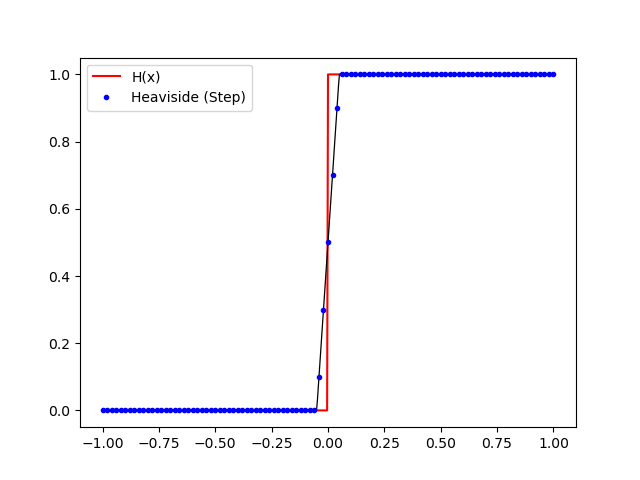

In [15]:
figure(6)
clf()

# Sample Heaviside function for the Step function

def heaviside_step(x,a):
    return where(abs(x) <= a/2, x/a + 1/2, heaviside(x,1))

# Exact heavside function
xf = linspace(-1,1,513)
plot(xf,heaviside(xf,1),'r',label='H(x)')
plot(xf,heaviside_step(xf,0.1), 'k',linewidth=0.9)
    
# Heaviside function (Step function)
x = linspace(-1,1,101)
H = heaviside_step(x,0.1)
plot(x,heaviside_step(x,0.1), 'b.',label='Heaviside (Step)')


    
legend()

<IPython.core.display.Javascript object>


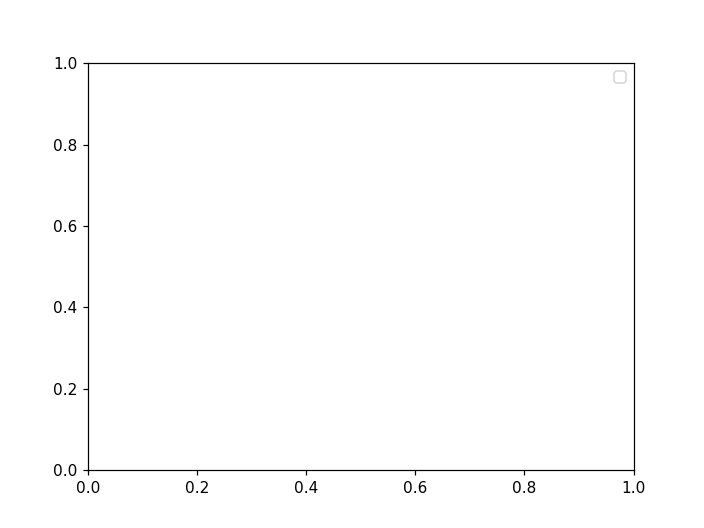

No handles with labels found to put in legend.


In [11]:
figure(7)
clf()

def heaviside_hat(x,a):
    pass
    # return ...
    
# Plot 

legend()

<IPython.core.display.Javascript object>


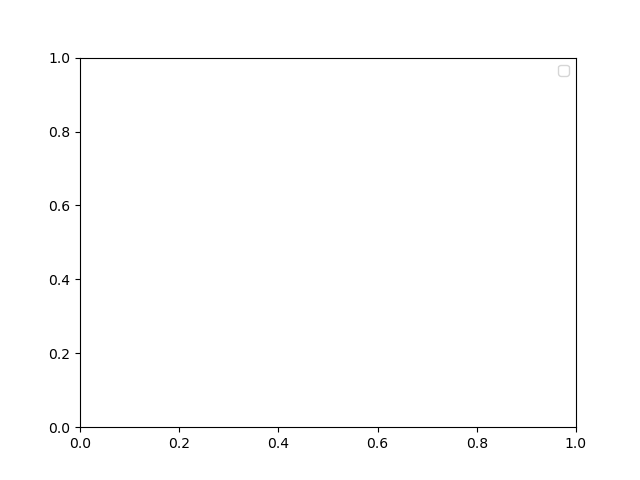

No handles with labels found to put in legend.


In [20]:
# figure(8)
clf()

def heaviside_heat(x,a):
    pass
    # return ...
    
# Plot 

legend()

# Questions
# 1): Actually, I am dealing with two differents methods because I don't know the sign of  "𝜂"  Should I use it as a negative or a positve value???

$\eta \in [0,1]$.    It can be computed from $x = -\varepsilon/2/2 + \eta \varepsilon$. 

# 2): For the two other plot I am not getting the expected result "𝐻𝜀(𝑥)=𝜂" How to conclude? is it still a 𝐻(𝑥)?? 

For the <font color=red>Hat function</font>, you will get two quadratic expressions involving $\eta$.   For the Heat kernel, the expression will involve the complementary error function $\mbox{erfc}(x)$.  



In [15]:
# For Heat equation
# figure(9)
# clf()
epsilon=0.05
x1=linspace(-epsilon/2,epsilon/2,1001)
# y=1/2 + epsilon/x

# COMMENT : second argument should be value of H(x) at 0. 
# Hv = np.heaviside(x1, y)

# COMMENT : You have to define your own heaviside function here.  Use 

from scipy.special import erfc

def heaviside_heat(x,a):
    pass
    # return ...



# print(Hv)
# plt.plot(Hv,"b*", markersize=5)

<IPython.core.display.Javascript object>


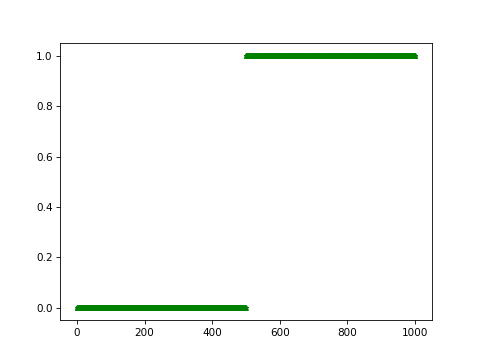

[0. 0. 0. ... 1. 1. 1.]


In [16]:
# For Heat equation

# For neta negative we have x2
# For neta negative we have x3
figure(10)
clf()
epsilon=0.05
neta=linspace(-1,1,1001)
# x1=linspace(-epsilon/2,epsilon/2,1001)
# x2=1/2 + (2*neta)/x + (2*(neta**2))/(x**2)
#x3=1/2 + (2*neta)/x + (-4*(neta**2))/(x**2)

x = linspace(-1,1,1001)
H = np.heaviside(x, 1)
#H = np.heaviside(x, x3)
print(H)
plt.plot(H,"g*", markersize=5)

<IPython.core.display.Javascript object>


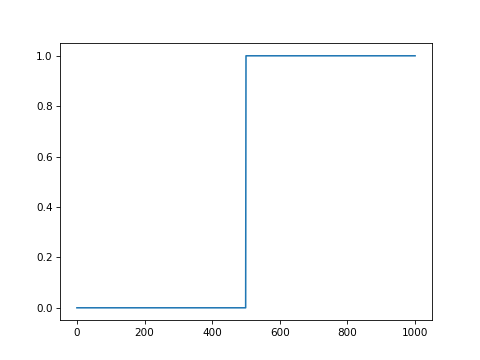

In [17]:
figure(11)
clf()
# For Heat equation

epsilon=0.05
neta=linspace(-1,1,1001)
y1=linspace(-epsilon/2,epsilon/2,1001)
y2=1/2 +  (1/(4*pi*epsilon)**(0.5))*(-1 + exp(-(x)**2/(4*epsilon))) 

# K = np.heaviside(y1, y2)
K = heaviside(y1,1)
plt.plot(K)

# Question : Why the Graph of the Heaviside of the two first functions (Heat and Hat) are the same??????

You have to define your own Heaviside function (just as your did with the Delta function).  

     def heaviside_step(x,a):
         .....
         
     def heaviside_hat(x,a):
         .....
         
Then you will get an approximation to the Heaviside functions.


## Exercise #4
<hr style="border-width:2px; border-color:black"></hr>

Verify that the **scaling property** holds for each discrete function. 

\begin{equation}
\hat{\delta}_\varepsilon(ax) = \frac{1}{|a|} \hat{\delta}_\varepsilon(x)
\end{equation}




### Your solution

\begin{equation}
{{\hat \delta }_\varepsilon }(ax) = \frac{1}{{|a|}}{{\hat \delta }_\varepsilon }(x) \Leftrightarrow |a|{{\hat \delta }_\varepsilon }(ax) = {{\hat \delta }_\varepsilon }(x)\\
 \Leftrightarrow \int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = \int\limits_{ - \infty }^\infty  {{{\hat \delta }_\varepsilon }(x)dx = 1} 
\end{equation}

**Let's verify that:**
$$\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = 1$$



**Step function**
\begin{equation}
\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = \int\limits_{\frac{{ - \varepsilon }}{2}}^{\frac{\varepsilon }{2}} {\left| a \right|\frac{1}{\varepsilon }dx = } \frac{{\left| a \right|}}{a}\int\limits_{\frac{{ - \varepsilon }}{2}}^{\frac{\varepsilon }{2}} {\frac{\xi }{\varepsilon }d\xi } = \frac{{\left| a \right|}}{a}\frac{1}{\xi }\left[ \xi  \right] = \frac{{\left| a \right|}}{a}= \left\{ {\begin{array}{*{20}{c}}
{if;a > 0:\frac{{|a|}}{a} = 1}\\
{i;a < 0: - \frac{{|a|}}{a} = 1}
\end{array}} \right.\\
\end{equation}

Therefore,
$$\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = 1 \Rightarrow {{\hat \delta }_\varepsilon }(ax) = \frac{1}{{|a|}}{{\hat \delta }_\varepsilon }(x)$$




**Hat function**

\begin{equation}
\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = \left| a \right|\int\limits_{\frac{{ - \varepsilon }}{2}}^{\frac{\varepsilon }{2}} {\frac{2}{\varepsilon }\left( {1 - \frac{{\left| {2ax} \right|}}{\varepsilon }} \right)dx} = \frac{{\left| a \right|}}{{\left| a \right|}}\int\limits_{\frac{{ - \varepsilon }}{2}}^{\frac{\varepsilon }{2}} {\frac{2}{\varepsilon }\left( {1 - \frac{{\left| {2\xi } \right|}}{\varepsilon }} \right)d\xi }  = \frac{{\left| a \right|}}{{\left| a \right|}} = 1
\end{equation}

Therefore,
$$\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = 1 \Rightarrow {{\hat \delta }_\varepsilon }(ax) = \frac{1}{{|a|}}{{\hat \delta }_\varepsilon }(x)$$




**Heat kernel**

\begin{equation}
\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = \int\limits_{ - \infty }^\infty  {|a|} \frac{1}{{\sqrt {4\pi \varepsilon } }}\exp \left( { - \frac{{{{\left( {ax} \right)}^2}}}{{4\varepsilon }}} \right)dx\\
Set:\xi  = ax \Rightarrow x = \frac{\xi }{a}\\
\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = |a|\int\limits_{ - \infty }^\infty  {\frac{1}{{\sqrt {4\pi \varepsilon } }}\exp \left( { - \frac{{{\xi ^2}}}{{4\varepsilon }}} \right) \times \frac{1}{a}d\xi }= \frac{{|a|}}{a}\int\limits_{ - \infty }^\infty  {\frac{1}{{\sqrt {4\pi \varepsilon } }}\exp \left( { - \frac{{{\xi ^2}}}{{4\varepsilon }}} \right)dx} = \left\{ {\begin{array}{*{20}{c}}
{if;a > 0:\frac{{|a|}}{a}\int\limits_{ - \infty }^\infty  {{{\hat \delta }_\varepsilon }(\xi )d\xi  = 1} }\\
{if;a < 0: - \frac{{|a|}}{a}\int\limits_{ - \infty }^\infty  {{{\hat \delta }_\varepsilon }(\xi )d\xi  = 1} }
\end{array}} \right.
\end{equation}

Therefore,

$$\int\limits_{ - \infty }^\infty  {|a|{{\hat \delta }_\varepsilon }(ax)} dx = 1 \Rightarrow {{\hat \delta }_\varepsilon }(ax) = \frac{1}{{|a|}}{{\hat \delta }_\varepsilon }(x)$$


### Comments
<hr style="border-width:2px; border-color:coral"></hr>


If you use `\begin{equation}` and `\end{equation}`, you can avoid using the `\\` to get a new line feed. 

<hr style="border-width:2px; border-color:coral"></hr>


## Exercise #5
<hr style="border-width:2px; border-color:black"></hr>

Show that each of the three $\hat{\delta}_\varepsilon(x)$ are *even* functions.  That is, 

\begin{equation}
\hat{\delta}_\varepsilon(-x) = \hat{\delta}_\varepsilon(x)
\end{equation}

### Question: Is it here the definition of the Odd and Even functions ? 

Odd function:${{\hat \delta }_\varepsilon }( - x) =  - {{\hat \delta }_\varepsilon }(x)$

Even function: ${{\hat \delta }_\varepsilon }( - x) = {{\hat \delta }_\varepsilon }(x)$


### Your solution


The **sifting property** hold in the sense that $\hat{\delta}_\varepsilon(x)$ is an **Even function**


**Step function**
\begin{equation}
{{\hat \delta }_\varepsilon }(x) = {{\hat \delta }_\varepsilon }( - x) =  - {{\hat \delta }_\varepsilon }(x) = \left\{ {\begin{array}{*{20}{c}}
{\frac{1}{\varepsilon }}& { - \frac{\varepsilon }{2} \le x < \frac{\varepsilon }{2}}\\
0&{{\mbox{otherwise}}}
\end{array}} \right.
\end{equation}

**Hat function**

\begin{equation}
{{\hat \delta }_\varepsilon }(x) = \left\{ \begin{array}{l}
\begin{array}{*{20}{c}}
{\frac{2}{\varepsilon }(1 + \frac{{2x}}{\varepsilon })}&{ - \frac{\varepsilon }{2} \le x \le 0}\\
{\frac{2}{\varepsilon }(1 - \frac{{2x}}{\varepsilon })}&{0 \le x \le \frac{\varepsilon }{2}}
\end{array}\\
0;otherwise
\end{array} \right. \Leftrightarrow {{\hat \delta }_\varepsilon }( - x) =  - {{\hat \delta }_\varepsilon }(x) = \left\{ \begin{array}{l}
\begin{array}{*{20}{c}}
{\frac{2}{\varepsilon }(1 - \frac{{2x}}{\varepsilon })}&{ - \frac{\varepsilon }{2} \le x \le 0}\\
{\frac{2}{\varepsilon }(1 + \frac{{2x}}{\varepsilon })}&{0 \le x \le \frac{\varepsilon }{2}}
\end{array}\\
0 & \mbox{otherwise}
\end{array} \right.
\end{equation}

**Heat kernel**

$${{\hat \delta }_\varepsilon }( - x) = \frac{1}{{\sqrt {4\pi \varepsilon } }}{e^{ - {{\left( { - x} \right)}^2}/4\varepsilon }} \ne  - {{\hat \delta }_\varepsilon }(x)$$


Because the **Heat kernel** is an **even function** then the property is not longer verified.

### Comments
<hr style="border-width:2px; border-color:coral"></hr>

You are right - I had the wrong definition.  The delta function satisfies $\hat{\delta}(-x) = \hat{\delta}(x)$ for each of the three discrete delta functions.   

**Tip:**
Use `\mbox{otherwise}` in piecewise definition of functions.

<hr style="border-width:2px; border-color:coral"></hr>


## Exercise #6
<hr style="border-width:2px; border-color:black"></hr>

Use each of the three discrete delta functions to evaluate the accuracy of the approximation

\begin{equation}
I(x) = \int_{-\infty}^\infty f(\xi)\, \hat{\delta_\varepsilon}(\xi-x)\, d\xi \approx f(x)
\end{equation}

for $x = 0.45$, and $f(x) = \cos(x)$. 

**Tips**


* Use the Trapezoidal rule to approxiamte the integral.  

* Use `linspace` to create a mesh on $[-1,1]$ with $N+1$ equally spaced points.   For the step and hat functions, set $\varepsilon = 0.01$.  For the heat kernel, set $\varepsilon = 10^{-5}$. 

* Create a table of values for $N = 16, 32, 64, 128, \dots, 1024$.   What is the convergence behavior for each function as $h \to 0$ ? 

### Comments
<hr style="border-width:2px; border-color:coral"></hr>

Fix several of the bugs/problems in this code. Make sure that each delta function gets a value that is closer and closer to cos(0.45).  

Example : Here are some sample results for the Hat Step function.  Why are the first few entries 0? 

        Error for Step function : e = 1.000e-02
        --------------------------------------------------------
            8   2.5000e-01       0.0000000000000000   9.0045e-01
           16   1.2500e-01       0.0000000000000000   9.0045e-01
           32   6.2500e-02       0.0000000000000000   9.0045e-01
           64   3.1250e-02       0.0000000000000000   9.0045e-01
          128   1.5625e-02       1.4048178758752163   5.0437e-01
          256   7.8125e-03       1.4074683935922501   5.0702e-01
          512   3.9062e-03       1.0556039797441716   1.5516e-01
         1024   1.9531e-03       0.8796711016819964   2.0776e-02
         2048   9.7656e-04       0.8794638205516543   2.0983e-02
         4096   4.8828e-04       0.8793601275787105   2.1087e-02
        --------------------------------------------------------
        True                     0.9004471023526769   0.0000e+00


<hr style="border-width:2px; border-color:coral"></hr>



# Answer: the first few entries 0 because of the smallest value of epsilon (e = 1.000e-02)

In [18]:
## Your code goes here
x=0.45
def Exact(x): 
    f=np.cos(x)
    return f

# COMMENT : Don't reassign the value of 'f' (a functin name) to a variable. This may explain why your 
# code below doesn't quite work. 

# f=f(x)
# f

print(Exact(x))



0.9004471023526769


In [19]:
## Your code goes here for the STEP FUNCTION
def Trap(f,a,b,N):
    # N=np.array([16, 32, 64, 128, 256, 512, 1024])
    
    
    # COMMENT : fix 'len(N)'  - is that what you really mean? 
    phi=np.linspace(-1,1,N+1)
#     epsilon=np.zeros(len(N))
#     for i in range(len(N)):
#         epsilon[i]=2/N[i]
#         h[i]=2/N[i]
# #     return epsilon, h
    h = (b-a)/N
    # epsilon=0.1
    # H=float(b-a)/N
    # A=np.zeros(len(N))
    T = 0
    for k in range(N):
        T += (h/2)* (f(phi[k])+f(phi[k+1]))
    return T

In [20]:
## Your code goes here for the STEP FUNCTION
##For the Step function

# x=0.45

# def Exact(x):
#     f=np.cos(x)
#     return f

# Nvec=np.array([16, 32, 64, 128, 256, 512, 1024])

N = 512
# h=(b-a)/N

epsilon = 0.01

# Okay for step function or hat function
# a = -epsilon/2
# b = epsilon/2

a = -1
b = 1

# Ext = Exact(x)*ones(len(N))
# print(Ext)    

def f(phi):
    # return np.cos(phi)/epsilon 
    return Exact(phi)*Stepfunct(phi-x)
    # return Exact(phi)*Hatfunct(phi-x)

# def Trap(f,a,b,N):
#     H=(b-a)/N
#     A=0
#     for k in range(1,N+1):
#         A+=(H/2)* (f(phi[k])+f(phi[k-1]))
#     return A


# Value of f(x) at x=0.45
Fx = Trap(f,a,b,N)
    
# print (N, "\t ", Fx, "\t",abs(Fx-cos(0.45)))

# COMMENT : Print out enough digits to see if your solution matches the one above
print("{:8d} {:24.16f} {:12.4e}".format(N,Fx,abs(Fx-cos(0.45))))    

Fx_expected = 1.0556039797441716  # From table above
print("{:8d} {:24.16f} {:12.4e}".format(N,Fx_expected,abs(Fx_expected-cos(0.45))))    


     512       1.0556039797441716   1.5516e-01
     512       1.0556039797441716   1.5516e-01


<hr style="border-width:4px; border-color:coral"></hr>

## Comments end here
<hr style="border-width:4px; border-color:coral"></hr>

In [1]:
    
    
# Ext = Exact(x)
Err = Ext - X
Err
  
print('-------------------------------Table of Values-----------------------------')
print("\n The Exact solution is ", Exact(x),"\n")
print("N \t \t Approximate \t \t Error")
for i in range(len(Nvec)):
    print (N[i], "\t ", X[i], "\t",Err[i])
    
print('-------------------------------------------------------------------------')    
# COMMENT :  Compare your answer to true value cos(0.45) = 0.9004471023526769 

NameError: name 'Ext' is not defined

In [10]:
## Your code goes here for the HAT FUNCTION

# Probably better to call this something like "Nvec" and reserve "N" for the scalar 
# value 
Nvec=np.array([16, 32, 64, 128, 256, 512, 1024])

# COMMMENT : You will have to write a loop and loop over all values in the array N


epsilon = 1e-02
a = -epsilon/2
b = epsilon/2
# print(b)
phi = np.linspace(a,b,Nvec[1]+1)
    

def g(phi):
    a = np.cos(phi)*(2/epsilon)
    b = (1-(2*(abs(phi-0.45)/epsilon)))
    return a,b,a*b
a,b,c = g(phi)
print(a,"\n", b,"\n" ,c) 
#I think the problem is the value of epsilon, 
print("   Observation : I think the problem is the value of epsilon because, I noticed for small value of epsilon gives large values of the function in  thousands")

# print(g(phi))

# COMMENT : You only need to define your Trap function once
# def Trap(f,a,b,N,phi):
#     H=(b-a)/N
#     A=0
#     E = zeros(N+1)
#     for k in range(1,N+1):
#         A+=(H/2)* (f(phi[k])+f(phi[k-1]))
#         E[k] = (H/2)* (f(phi[k])+f(phi[k-1]))
#     return A, E
# A,E = Trap(g,a,b,N[0],phi)
# print(E)

# X = np.zeros(len(Nvec))
# for i in range(len(Nvec)):
#     phi = np.linspace(a,b,Nvec[i]+1)
#     X[i] = Trap(g,a,b,Nvec[i],phi)
# #     X[i] = x 
# print(X)
# print('-----------------Table of Values-------------')
# for i in range(len(Nvec)):
#     print ("N = ",Nvec[i], "and its Area = ", X[i])

[199.99750001 199.99780274 199.99808594 199.99834961 199.99859375
 199.99881836 199.99902344 199.99920898 199.999375   199.99952148
 199.99964844 199.99975586 199.99984375 199.99991211 199.99996094
 199.99999023 200.         199.99999023 199.99996094 199.99991211
 199.99984375 199.99975586 199.99964844 199.99952148 199.999375
 199.99920898 199.99902344 199.99881836 199.99859375 199.99834961
 199.99808594 199.99780274 199.99750001] 
 [-90.     -89.9375 -89.875  -89.8125 -89.75   -89.6875 -89.625  -89.5625
 -89.5    -89.4375 -89.375  -89.3125 -89.25   -89.1875 -89.125  -89.0625
 -89.     -88.9375 -88.875  -88.8125 -88.75   -88.6875 -88.625  -88.5625
 -88.5    -88.4375 -88.375  -88.3125 -88.25   -88.1875 -88.125  -88.0625
 -88.    ] 
 [-17999.77500047 -17987.30238378 -17974.82797391 -17962.3517745
 -17949.87378921 -17937.39402171 -17924.91247566 -17912.42915471
 -17899.94406253 -17887.45720278 -17874.96857911 -17862.47819519
 -17849.98605469 -17837.49216126 -17824.99651855 -17812.49913025

# ###Observation : I think the problem is the value of epsilon because, I noticed small value of epsilon gives large values of the function in thousands!!!!!!!

In [27]:
## Your code goes here for the HEAT KERNEL
N=np.array([16, 32, 64, 128, 256, 512, 1024])
h=2/N
epsilon = h
a = -epsilon/2
b = epsilon/2


    

def f(phi):
    # COMMENT : This has a bug! 
    return np.cos(phi)*(1/(4*np.pi*epsilon))*np.exp(-((0.45-epsilon)**2)/(4*epsilon))

def Trap(f,a,b,N,phi):
    H=(b-a)/N
    A=0
    for k in range(1,N+1):
        A+=(H/2)* (f(phi[k])+f(phi[k-1]))
    return A

X = np.zeros(len(N))
for i in range(len(N)):
    phi = np.linspace(a[i],b[i],N[i]+1)
    x = Trap(f,a[i],b[i],N[i],phi)
    X[i] = x[i] 

print('-----------------Table of Values-------------')
for i in range(len(N)):
    print ("N = ",N[i], "and its Area = ", X[i])

-----------------Table of Values-------------
N =  16 and its Area =  0.06438140307452932
N =  32 and its Area =  0.04363863790519483
N =  64 and its Area =  0.01956765252950092
N =  128 and its Area =  0.00388768789021048
N =  256 and its Area =  0.0001525558323454088
N =  512 and its Area =  2.3422083079745434e-07
N =  1024 and its Area =  5.5129150020467e-13


## Exercise #7
<hr style="border-width:2px; border-color:black"></hr>

Use the discrete delta functions to evaluate the solution to 

\begin{equation}
q_t + uq_x = \delta(x-x_m) \delta(t-t_m), \qquad x \in [-1,1]
\end{equation}

for a single data point $(x_0,t_0) = (0.3, 0.1)$.   Set $u = 1$ and use initial conditions $q(x,0) = 0$. 

Plot the solutions for each delta function approximation over the domain $[-1,1]$.  Use enough resolution to get a smooth solution. Choose a time $t > t_0$ to plot the solution. 

**Tip**

* Adjust the data point $(x_0,t_0)$ if necessary so that you get a reasonable solution. 


# I haven't solved this exercise yet, I am still working on

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=np.array([16, 32, 64, 128, 256, 512, 1024])
h=2/N
epsilon = h
d=1
x = np.arange(-1,1+1,10001)
epsilon=np.linspace(0.1,1,len(x))
t = np.arange(0,1,1001)
def f(t,x,epsilon):
    xmean = np.mean(x)
    tmean = np.mean(t)
#   return 4/((epsilon)**2) - (8/(epsilon)**3)*(abs(t-tmean)+ abs(x-xmean)) + (16/(epsilon)**4)*(abs(t-tmean))*(abs(x-xmean))
    return 1/(4*np.pi*epsilon)*exp(-([(x-xmean)**2 + (t-tmean)**2]/(4*epsilon)**2))
#     return 1/((epsilon)**2)

n = f(t,x,epsilon)
# plt.plot(x,n)

dx=0.01
mu=1
c=1
dt=(mu*dx)/c
x0=0.3
xn=1 # xn=L=1
t0=0
tn=1  # tn=T=1

x=np.arange(x0,xn+dx,dx)
t=np.arange(t0,tn+dt,dt)
epsilon=np.linspace(0.1,1,len(x))


q0=0

q=np.zeros((len(t),len(x)))
q[0]=q0
for n in range (len(t)-1):
    for j in range (1,len(x)-1):
        q[n+1,j]=((q[n,j+1]+q[n,j-1])/2)-mu*((q[n,j+1]-q[n,j-1])/2) + dt*f(t[n],x[j],epsilon[j])
    

In [ ]:
# for i in range(len(t)):
for i in range(len(t)):
    plt.plot(x,q[i])

You can evaluate $\delta(t-\tau)$ in exactly the same way you evaluate $\delta(x-\xi)$.  It is just a change in the name of the variable.
(Your Green’s function is correct, but the last equality is not correct, since
\begin{equation}
\delta(x - \xi - c(t-\tau))H(t-\tau) \ne \delta(x-\xi)\delta(t-\tau)H(t-\tau)
\end{equation} (

But I read some where that $\delta \left( {x,y} \right) = \delta \left( x \right)\delta \left( x \right)$  if it is the case it is not possible to write  $\delta \left( {\left( {x - \xi } \right), - c\left( {t - \tau } \right)} \right) = \delta \left( {x - \xi } \right)\delta \left( {c\left( {\tau  - t} \right)} \right)$? since $\delta$ is an even function and c a constante (c=1)

When you integrate
\begin{equation}
H_\varepsilon(x) = \frac{1}{\sqrt{4\pi\varepsilon}}\int_{-\infty}^x  e^{\frac{-\xi^2}{4\varepsilon}} \; d\xi
\end{equation}
you make a substitution $\eta = \xi/\sqrt{4\varepsilon}$ and the upper limit of integration becomes $x/\sqrt{4\varepsilon}$.   This is how $\varepsilon$ is involved in the final answer.
For this delta function, you may want to take $\varepsilon=10^{-5}$ to get a sharper Heaviside approximation. 

For the 1d problem, our delta function will always take a single variable.  So we have never written $\delta(x-\xi,-c(t-\tau))$.

Are you plotting the Green’s function $G(x,t,\xi,\tau)$?  I suggest using the heat kernel as the delta function representation.

Your results are right.  And no, you can’t really combine them - this is a piecewise defined function.   If you can plot it, that would be great.   Might take more than one where call.   The piece in $0 < x < \varepsilon/2$ can also be written $1-2(1-\eta)^2$.
Heat kernel :  There are different ways to express the resulting function, but your answer should involve $\varepsilon$.    For this one, you don’t need to make the substitution $x = -\varepsilon/2 + \eta \varepsilon$, but can use the fact that
\begin{equation}
\lim_{x \to \infty} \mbox{erf}(x) = 1
\end{equation}
and
\begin{equation}
\lim_{x \to -\infty} \mbox{erf}(x) = -1
\end{equation}
Also, $\mbox{erf}(x) + \mbox{erfc}(x) = 1$ might be useful.  You can plot your solution to see that you have a formulation that works.  But as I said, there could be more than one formulation, depending on whether you use erf or erfc. (edited) 

Your two advection solutions look good.  Just one bug, and a few minor issues :
Be sure to call Gfunct with arguments in  the right order (you reversed x and t). 
When defining the spatial mesh, choose a value for $N$, then define $ex = (b-a)/N$.  Use $N$ and $M$ whenevr you need to dimension arrays. 

Not necessarily.   You only need a few times steps e.g. $M=20$, but probably set $N=128$ or something, to get a nice plot.   For your paper, you only need to show 3-4 snapshots of the solution in time.  Maybe one close to $t_m=0.1$ and then a few more showing the solution growing (due to the influence of $\delta(t-t_m)$ and one at $T=0.5$.   No need to go much beyond $T=0.5$.

Okay, It sound good, thank you.

But what about $x_m$ ?  Is it enough to take $x_m= 0.3$? because you told me to  Adjust the data point $(x_m,t_m)$ to get a reasonable solution. And also how to know that you got a reasonable solution? is it only by the shape of the curve??